In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np 

In [15]:


# --- Definição dos oráculos ---
def constant_oracle_0(qc):
    pass

def constant_oracle_1(qc):
    qc.x(1)

def balanced_oracle_1(qc):
    qc.cx(0, 1)

def balanced_oracle_2(qc):
    qc.x(0)
    qc.cx(0, 1)
    qc.x(0)

# Lista de oráculos possíveis
list_oraculos = [constant_oracle_0, constant_oracle_1, balanced_oracle_1, balanced_oracle_2]

# Sorteia um oráculo aleatoriamente
sortear_list_oraculos = np.random.choice(list_oraculos)
print("Oráculo sorteado:", sortear_list_oraculos.__name__)

# --- Algoritmo de Deutsch ---
def deutsch_algorithm(oracle):
    qc = QuantumCircuit(2, 1)
    qc.x(1)
    qc.h([0, 1])
    qc.barrier()
    oracle(qc)
    qc.barrier()
    qc.h(0)
    qc.measure(0, 0)
    return qc

# --- Executa o algoritmo com o oráculo sorteado ---
qc = deutsch_algorithm(sortear_list_oraculos)

# --- Simulação ---
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

# --- Exibe histograma ---
plot_histogram(counts)
print(counts)


Oráculo sorteado: constant_oracle_1
{'0': 1024}


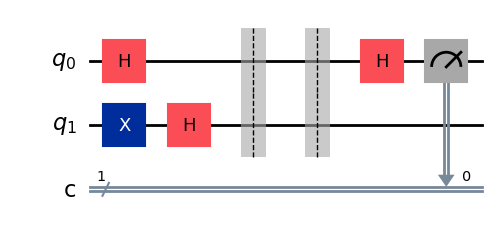

In [10]:
qc.draw('mpl')

In [11]:
from qiskit import QuantumCircuit

def oracle_f(qc):
    qc.x(0)       # inverter o controle
    qc.cx(0, 1)   # CNOT atua quando o qubit de entrada era |0>
    qc.x(0)       # desfaz a inversão
    return qc

print(qc)

     ┌───┐      ░  ░ ┌───┐┌─┐
q_0: ┤ H ├──────░──░─┤ H ├┤M├
     ├───┤┌───┐ ░  ░ └───┘└╥┘
q_1: ┤ X ├┤ H ├─░──░───────╫─
     └───┘└───┘ ░  ░       ║ 
c: 1/══════════════════════╩═
                           0 


In [12]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

def deutsch_algorithm(oracle):
    qc = QuantumCircuit(2, 1)

    # Estado inicial |0>|1>
    qc.x(1)
    
    # Coloca ambos em superposição
    qc.h([0, 1])
    qc.barrier()

    # Aplica o oráculo
    oracle(qc)
    qc.barrier()

    # Interfere o primeiro qubit
    qc.h(0)

    # Mede o primeiro qubit
    qc.measure(0, 0)
    return qc


{'1': 1024}


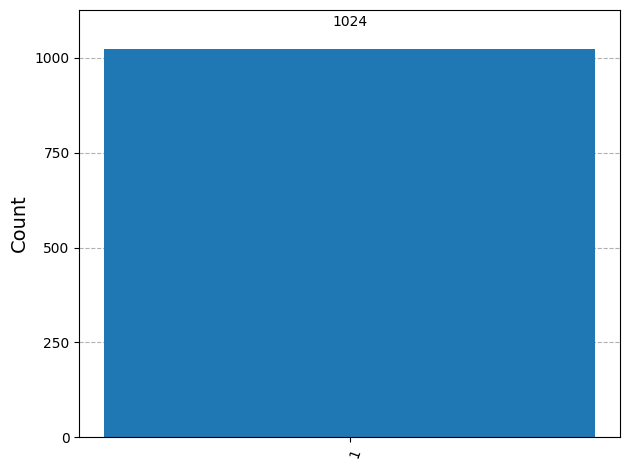

In [13]:
sim = AerSimulator()
qc = deutsch_algorithm(oracle_f)

compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)


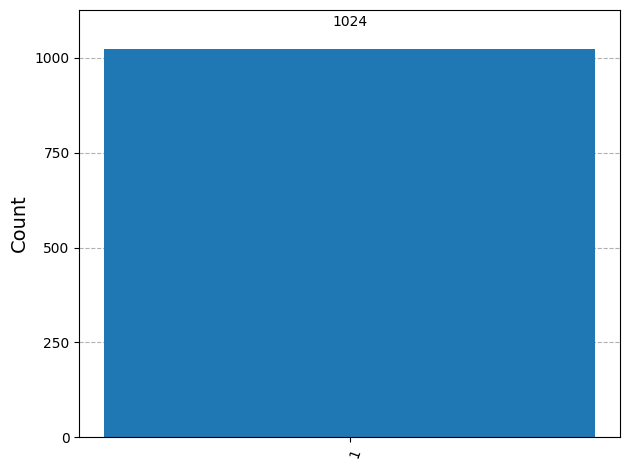

In [25]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# --- Oráculos ---
def constant_oracle_0(qc):
    pass

def constant_oracle_1(qc):
    qc.x(1)

def balanced_oracle_1(qc):
    qc.cx(0, 1)

def balanced_oracle_2(qc):
    qc.x(0)
    qc.cx(0, 1)
    qc.x(0)

# --- Algoritmo de Deutsch ---
def deutsch_algorithm(oracle):
    qc = QuantumCircuit(2, 1)
    qc.x(1)
    qc.h([0, 1])
    qc.barrier()
    oracle(qc)
    qc.barrier()
    qc.h(0)
    qc.measure(0, 0)
    return qc

# --- Executa o algoritmo ---
qc = deutsch_algorithm(balanced_oracle_2)
qc.draw('mpl')

# --- Simulação ---
sim = AerSimulator()
compiled_circuit = transpile(qc, sim)
result = sim.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()

# --- Plota o histograma ---
plot_histogram(counts)


In [ ]:
def oraculo_classico(x):
    funcao = pow(2, x) + 4
    resultado = funcao % 2
    print(f"f{x} = {resultado}")
    return resultado


f_0 = oraculo_classico(0)
f_1 = oraculo_classico(1)

if f_0 == f_1:
    print("Função constante")
else:
    print("Função balanceada")

f0 = 1
f1 = 0
Função balanceada


In [53]:
def oraculo_constante(x):
    funcao = 2 * x + 5
    resultado = funcao % 2  # se quiser reduzir a saída para 0 ou 1
    print(f"f{x} = {resultado}")
    return resultado


f_0 = oraculo_constante(0)
f_1 = oraculo_constante(1)

if f_0 == f_1:
    print("Função constante")
else:
    print("Função balanceada")

f0 = 1
f1 = 1
Função constante


# Resolução Matemática do Algoritmo de Deutsch

## Introdução

O algoritmo de Deutsch é um dos primeiros algoritmos quânticos que demonstra vantagem sobre a computação clássica. O problema consiste em determinar se uma função $f: \{0,1\} \rightarrow \{0,1\}$ é constante ou balanceada usando apenas uma consulta ao oráculo.

## Circuito Quântico de Deutsch - Resolução Matemática

### Passo 1: Inicialização

Começamos com dois qubits no estado $|00\rangle$.

### Passo 2: Portas Hadamard e X

Aplicamos a porta Hadamard no qubit 0 e porta X no qubit 1:

$$
\begin{align*}
|\psi_0\rangle &= |00\rangle \\
|\psi_1\rangle &= (H \otimes X) |00\rangle = H|0\rangle \otimes X|0\rangle \\
&= \frac{|0\rangle + |1\rangle}{\sqrt{2}} \otimes |1\rangle = \frac{|01\rangle + |11\rangle}{\sqrt{2}}
\end{align*}
$$


### Passo 3: Hadamard no Qubit 1

Aplicamos a porta Hadamard no qubit 1:

$$
\begin{align*}
|\psi_2\rangle &= (I \otimes H) |\psi_1\rangle = \frac{1}{\sqrt{2}} \left( |0\rangle \otimes H|1\rangle + |1\rangle \otimes H|1\rangle \right) \\
&= \frac{1}{\sqrt{2}} \left( |0\rangle \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}} + |1\rangle \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}} \right) \\
&= \frac{1}{2} \left( |00\rangle - |01\rangle + |10\rangle - |11\rangle \right)
\end{align*}
$$

### Passo 4: Aplicação do Oráculo

O oráculo $U_f$ age como: $U_f |x, y\rangle = |x, y \oplus f(x)\rangle$. O estado $(|0\rangle - |1\rangle)/\sqrt{2}$ é um autoestado:

$$
\begin{align*}
U_f |x\rangle \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}} &= (-1)^{f(x)} |x\rangle \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}}
\end{align*}
$$

Portanto:

$$
\begin{align*}
|\psi_3\rangle &= U_f |\psi_2\rangle = \frac{1}{2} U_f \left( |00\rangle - |01\rangle + |10\rangle - |11\rangle \right) \\
&= \frac{1}{\sqrt{2}} \left[ (-1)^{f(0)} |0\rangle + (-1)^{f(1)} |1\rangle \right] \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}}
\end{align*}
$$

### Passo 5: Hadamard no Qubit 0

Aplicamos Hadamard no primeiro qubit:

$$
\begin{align*}
|\psi_4\rangle &= (H \otimes I) |\psi_3\rangle \\
&= \frac{1}{\sqrt{2}} \left[ (-1)^{f(0)} H|0\rangle + (-1)^{f(1)} H|1\rangle \right] \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}} \\
&= \frac{1}{\sqrt{2}} \left[ (-1)^{f(0)} \frac{|0\rangle + |1\rangle}{\sqrt{2}} + (-1)^{f(1)} \frac{|0\rangle - |1\rangle}{\sqrt{2}} \right] \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}} \\
&= \frac{1}{2} \left[ \left( (-1)^{f(0)} + (-1)^{f(1)} \right) |0\rangle + \left( (-1)^{f(0)} - (-1)^{f(1)} \right) |1\rangle \right] \otimes \frac{|0\rangle - |1\rangle}{\sqrt{2}}
\end{align*}
$$

### Passo 6: Medida do Qubit 0

Analisamos os coeficientes:

#### Caso 1: Função Constante ($f(0) = f(1)$)

$$
\begin{align*}
\text{Coeficiente de } |0\rangle &= \frac{(-1)^{f(0)} + (-1)^{f(0)}}{2} = (-1)^{f(0)} \\
\text{Coeficiente de } |1\rangle &= \frac{(-1)^{f(0)} - (-1)^{f(0)}}{2} = 0
\end{align*}
$$

**Medida**: $|0\rangle$ com probabilidade 1

#### Caso 2: Função Balanceada ($f(0) \neq f(1)$)

$$
\begin{align*}
\text{Coeficiente de } |0\rangle &= \frac{(-1)^{f(0)} + (-1)^{f(1)}}{2} = 0 \\
\text{Coeficiente de } |1\rangle &= \frac{(-1)^{f(0)} - (-1)^{f(1)}}{2} = (-1)^{f(0)}
\end{align*}
$$

**Medida**: $|1\rangle$ com probabilidade 1

## Conclusão

O algoritmo de Deutsch determina com 100% de certeza se uma função é constante ou balanceada medindo apenas o primeiro qubit:

- **Medida = 0** → Função CONSTANTE
- **Medida = 1** → Função BALANCEADA

A chave do algoritmo está no **phase kickback** - a capacidade de codificar informação sobre $f(x)$ nas fases relativas dos estados quânticos.


$$
\frac{(-1)^{f(0)} |0\rangle + (-1)^{f(1)} |1\rangle} {\sqrt{2}}
$$

